
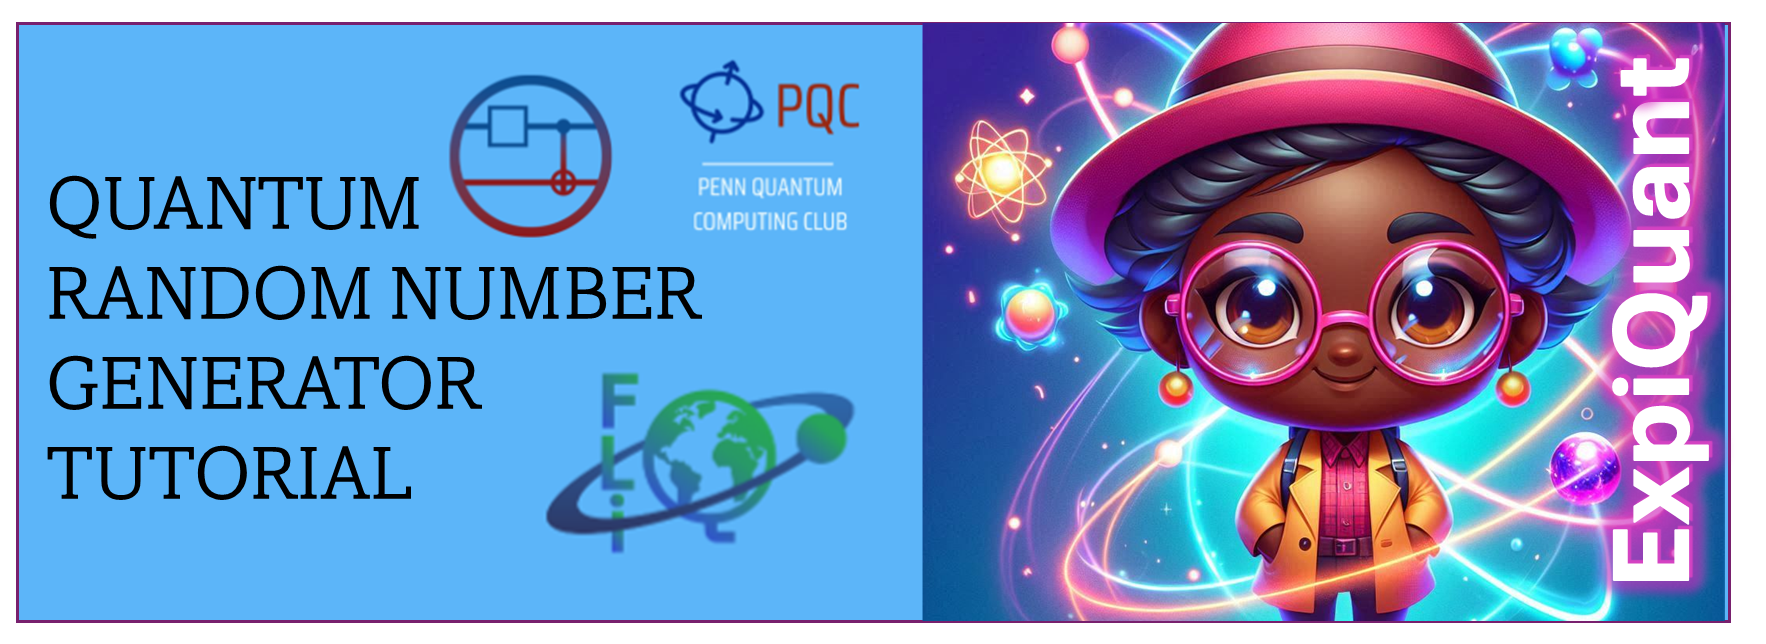

# 🧪 Quantum Random Number Generator (QRNG)
**Team Members:** Khethiwe Dlamini

**Honorary Members:** ChatGPT, Copilot, Gemini, and Perplexity 😎

**Date:** 2025-05-18

---

🎯 **Objective:** In this tutorial, we through a quantum experiment called a quantum random number generator (QRNG for short). We will build a QRNG using Qiskit, run it on both a simulator and real IBM Quantum hardware, and then analyze our results with fun visualizations! 

# 💡Understanding Randomness
## What is randomness?
Randomness occurs when we are not able to predict what will happen next due to the absense of a clear pattern in events. Flipping a coin is random, for instance because you can't know if you will get a heads or tails. Computers are usually used to generate random numbers for a myriad of reasons, and they do so using using algorithms. The numbers generated in this way are called pseudo-random, because if you know the initial conditions of the algorithm, that is the seed, then you can predict what the generated numbers will be. So, the numbers are not truly random! [1] Randomness shows up also in chaotic and unpredictable events in nature, for example, weather conditions which can be predictable under the right conditions (such as estimating the likelihood of it raining tomorrow) or unpredictable under other conditions (like not being able to tell if there will be a flood in 3 years' time) [2].

## Why is quantum randomness special?
Quantum randomness is special because it's arguably the closest we can get to true randomness [3] [4]. This quality sets quantum random number generators apart from classical random number generators. Let's explore some of the math behind this fascinating phenomenon.

## ➗ The Math Behind It
You have probably heard of a bit (think computers), which can either be 0 or 1. The quantum equivalent of that is a **qubit**. A qubit can be in state $|0⟩$, $|1⟩$, or a combination of both these states (called a **superposition**). [5] It is convention to represent qubit states in this way, however a detailed explanation of why this is so is beyond the scope of this tutorial.

One way to put a qubit into a superposition is by using a mathematical operation known as the **Hadamard (H) gate**. A qubit restricted by the Hadamard gate is in both states $|0⟩$ and $|1⟩$ equally until it is measured.[6] The mathematical representation of the measurement is quite intuitively:

$$ H|0⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩) $$

When measured, the qubit *collapses* to either |0⟩ or |1⟩ — each with a 50% chance.

### Common Confusions (Anticipated & Addressed)

| Confusion | Clarification |
|-----------|---------------|
| **“How is this different from a coin toss?”** | A coin toss is classical — it's determined by physics, even if unpredictable in practice. Quantum measurement is inherently probabilistic. |
| **“Why do I need a Hadamard gate?”** | Without it, the qubit stays in state \(\lvert 0 \rangle\). The Hadamard gate creates the necessary superposition for randomness. |
| **“Why do results vary?”** | Quantum randomness is real — each run gives different outcomes. You should expect slightly uneven results due to statistical fluctuations. |
| **“Why does real hardware show bias?”** | Quantum devices are noisy; real-world errors (gate fidelity, decoherence) can skew ideal outcomes slightly. We’ll explore this in the hardware section. |


# Step 3: Let's build the Circuit 🛠️

Installations and Set-up

In [ ]:
%pip install "qiskit<2.0.0" qiskit-aer qiskit-ibm-provider matplotlib

# Imports

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit_ibm_provider import IBMProvider, Session
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Khetiwe Dlamini\AppData\Local\Temp\ipykernel_25736\2670552050.py:3: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider, Session


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
print("qiskit:", qiskit.__version__)
import qiskit_ibm_provider
print("qiskit-ibm-provider:", qiskit_ibm_provider.__version__)

NameError: name 'qiskit' is not defined

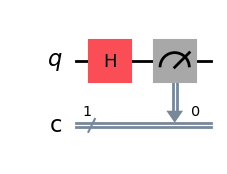

In [ ]:
# Step 1: Create a 1-qubit quantum circuit with 1 classical bit
qc = QuantumCircuit(1, 1)

# Step 2: Apply Hadamard gate to put the qubit in superposition
qc.h(0)

# Step 3: Measure the qubit
qc.measure(0, 0)

# Visualize the circuit
fig = qc.draw('mpl')
plt.show() 

# Executing the Circuit on a Simulator
Let’s test the QRNG on a noiseless simulator.

Measurement results: {'0': 512, '1': 512}


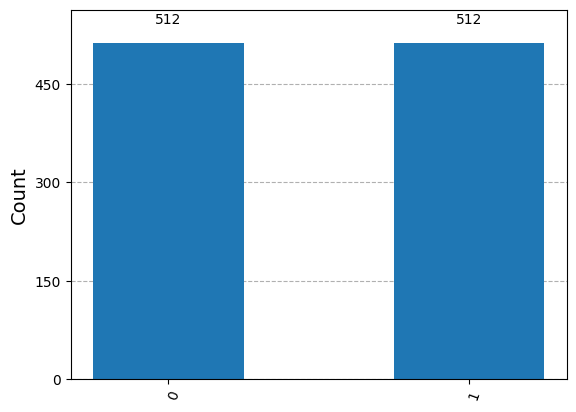

In [ ]:
# Use Aer's simulator
simulator = AerSimulator()

# Assemble and execute the circuit
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()

# Get and plot the counts
counts = result.get_counts(qc)
print("Measurement results:", counts)
plot_histogram(counts)
plt.show()

# IBM Quantum Execution

In [ ]:
provider = IBMProvider()
for backend in provider.backends():
    print(backend.name) #Before selecting a backend, always list the available ones for your account

ibm_sherbrooke
ibm_brisbane


In [ ]:
backend = provider.get_backend("ibm_brisbane")
# Build your circuit
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Use Sampler primitive
sampler = StatevectorSampler()
result = sampler.run(qc).result()
quasi_dist = result.quasi_dists[0]
# Convert to plain floats:
print({k: round(float(v),2) for k, v in quasi_dist.items()})

{0: 0.4999999999999999, 1: 0.4999999999999999}


C:\Users\Khetiwe Dlamini\AppData\Local\Temp\ipykernel_13660\4131516758.py:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


## 📚 References
1. Knuth, D. E. (1997). The Art of Computer Programming, Volume 2: Seminumerical Algorithms.
2. Rogers, T. (2024) Chaos in ecology is more common than you think, Research Communities by Springer Nature. Available at: https://communities.springernature.com/posts/chaos-in-ecology-is-more-common-than-you-think#:~:text=Systems%20that%20are%20’chaotic’%20are,predict%20accurately%20beyond%20several%20days. (Accessed: 18 May 2025). 
3. Frauchiger, D., Renner, R., & Troyer, M. (n.d.). True randomness from realistic quantum devices [Slide show]. ETH Zurich.
4. Matteis, A. (2024) Quantum randomness, QTI Quantum Telecommunications Italy. Available at: https://www.qticompany.com/quantum-randomness/ (Accessed: 18 May 2025). 
5. Nielsen, M.A. and Chuang, I.L. (2010) Quantum Computation and Quantum information Michael A. Nielsen & Isaak L. Chuang. Cambridge u.a.: Cambridge Univ. Press. 
6. Hadamard Gate (2025) Quantum Inspire. Available at: https://www.quantum-inspire.com/kbase/hadamard/ (Accessed: 18 May 2025). 

- Qiskit Textbook: https://qiskit.org/textbook/ch-algorithms/quantum-random-number-generator.html
- IBM Quantum: https://quantum-computing.ibm.com/
- Nielsen & Chuang, *Quantum Computation and Quantum Information*
- Qiskit version: 1.4.3
- qiskit-ibm-provider version: 0.11.0